<a href="https://colab.research.google.com/github/euguroglu/Machine-Learning-Projects/blob/master/Logistic_Regression_Mobile_phone_price_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sys
from sklearn.datasets import load_boston
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler
import math

## Data Preperation

In [13]:
df = pd.read_csv('train.csv')

In [80]:
df = df.sort_values(by=['price_range'])

In [81]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,Res
1838,720,1,0.90,1,12,1,14,0.80,165,4,14,366,1234,1086,14,7,3,1,1,0,0,451644
1762,808,1,0.50,1,3,0,46,0.50,105,8,15,119,529,1082,15,5,10,1,0,1,0,62951
419,914,1,0.90,0,2,0,4,0.80,100,2,12,191,1495,808,11,7,5,1,1,0,0,285545
846,1489,0,2.40,1,8,0,32,0.60,200,1,16,172,812,776,7,6,8,0,0,0,0,139664
845,1907,0,2.00,0,13,0,55,0.90,105,7,15,713,1513,286,14,4,17,1,0,1,0,1078769


In [82]:
df.shape

(2000, 22)

In [83]:
df['Res'] = df['px_height']*df['px_width']

In [84]:
X = df.drop(['px_height','px_width'],1)

In [85]:
y = df['price_range']

In [86]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,Res
1838,720,1,0.90,1,12,1,14,0.80,165,4,14,1086,14,7,3,1,1,0,0,451644
1762,808,1,0.50,1,3,0,46,0.50,105,8,15,1082,15,5,10,1,0,1,0,62951
419,914,1,0.90,0,2,0,4,0.80,100,2,12,808,11,7,5,1,1,0,0,285545
846,1489,0,2.40,1,8,0,32,0.60,200,1,16,776,7,6,8,0,0,0,0,139664
845,1907,0,2.00,0,13,0,55,0.90,105,7,15,286,14,4,17,1,0,1,0,1078769


In [87]:
y.value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

## Correlation

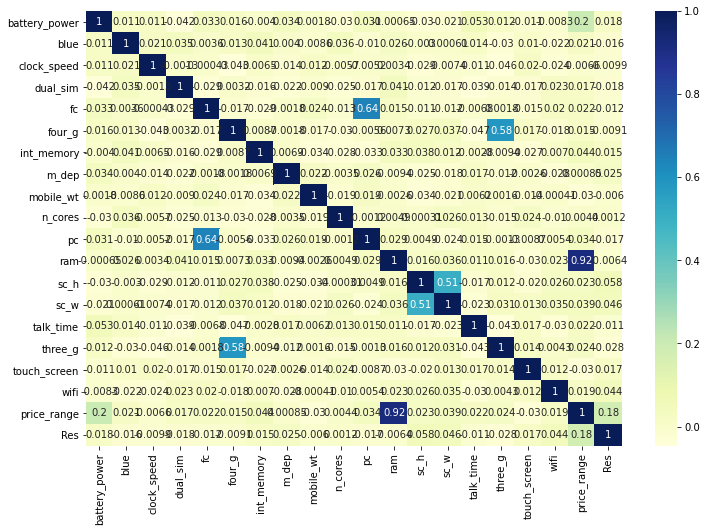

In [88]:
pd.options.display.float_format = '{:,.2f}'.format
corr_matrix = X.corr()
corr_matrix
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.show()

In [89]:
x

,battery_power,ram
0,842,2549
1,1021,2631
2,563,2603
3,615,2769
4,1821,1411
...,...,...
1995,794,668
1996,1965,2032
1997,1911,3057
1998,1512,869


Text(0.5, 1.0, 'Price Range Distrubtion')

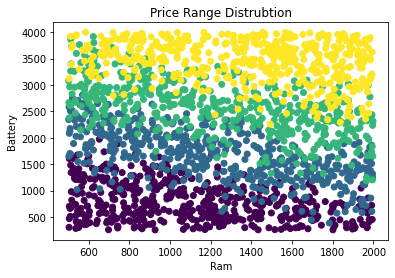

In [90]:

x = df[['battery_power','ram']]

Y = y.values
plt.scatter(x.values[:,0],x.values[:,1],c=Y)
plt.xlabel('Ram')
plt.ylabel('Battery')
plt.title('Price Range Distrubtion')

In [91]:
X = X[['ram','battery_power','Res']]

In [92]:
X = StandardScaler().fit_transform(X)

## Defining activation function

In [93]:
def sigmoid(z):
  return 1/(1+math.e**(-z))

## Defining cost function

In [94]:
def loss(y_train, y_predicted):
  return -(y_train * math.log(y_predicted) + (1.0 - y_train) * math.log(1 - y_predicted))

## Prediction function

In [95]:
def predict(sample):
  result = 0.0
  for i in range(len(sample)):
    result = result + weights[i]*sample[i]

  result = result + bias
  return sigmoid(result)

## Back propagation

In [96]:
num_features = 3

def train_one_epoch(x_train_samples, y_train_samples):
  cost = 0.0
  dw = [0.0]*num_features
  db = 0.0

  global bias, weights

  m=len(x_train_samples)
  for i in range(m):
    x_sample = x_train_samples[i]
    y_sample = y_train_samples[i]
    predicted = predict(x_sample)
    cost = cost + loss(y_sample,predicted)

    dz = predicted - y_sample

    for j in range(len(weights)):
      dw[j] = dw[j] + x_sample[j] * dz
    db = db + dz
  
  cost = cost / m
  db = db / m
  bias = bias - learning_rate*db
  for j in range(len(weights)):
    dw[j] = dw[j] / m
    weights[j] = weights[j] - learning_rate*dw[j]
  
  return cost

## Training

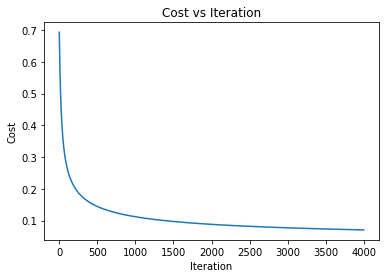

In [97]:
weights = [0.0]*num_features
bias = 0.0
learning_rate = 0.1
epochs = 4000

x_train_samples = X
y_train_samples = [1 if i == 0 else 0 for i in y]

loss_array = []
for epoch in range(epochs):
  loss_value = train_one_epoch(x_train_samples,y_train_samples)
  loss_array.append(loss_value)

plt.plot(range(epochs), loss_array)
plt.ylabel('Cost')
plt.xlabel('Iteration')
plt.title('Cost vs Iteration')
plt.show()

## Result Visualization

Predict price range 0

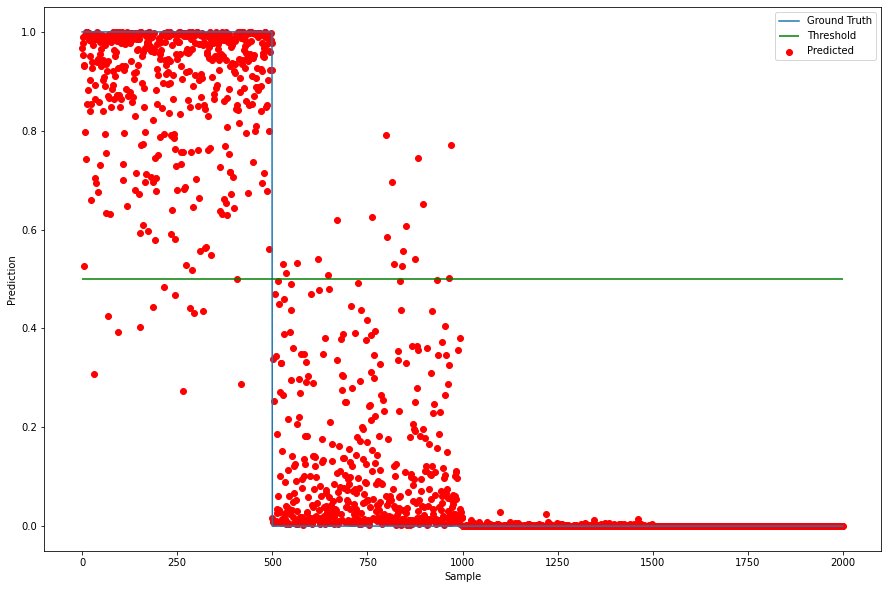

Accuracy: 98.45


In [104]:
predictions = []

m = len(x_train_samples)
correct = 0
for i in range(m):
  sample = x_train_samples[i]
  value = predict(sample)
  predictions.append(value)
  if value >= 0.5:
    value = 1
  else:
    value = 0
  if value == y_train_samples[i]:
    correct = correct + 1

fig, ax = plt.subplots(figsize=(15, 10))
ax.hlines(0.5, 0, 2000, colors="green", zorder=100, label='Threshold')
plt.scatter(range(m),predictions,label='Predicted',c='r')
plt.plot(range(m),y_train_samples,label='Ground Truth')
plt.ylabel('Prediction')
plt.xlabel('Sample')
plt.legend(loc='best')

plt.show()

print('Accuracy: {:.2f}'.format(100*correct/m))